# Simple model using total square feet and number of bedrooms

In [3]:
%matplotlib inline

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.linear_model

## Load data

In [5]:
train_file = "../data/train.csv"
train_full = pd.read_csv(train_file)

test_file = "../data/test.csv"
test_full = pd.read_csv(test_file)

## Simplify data

In [6]:
output = "SalePrice"
# Note: GrLivArea = 1stFlrSF+2ndFlrSF+LowQualFinSF
features_simple = ["1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", 
                   "BsmtFinSF1", "BsmtFinSF2", 
                   "BedroomAbvGr",
                   "FullBath", "HalfBath", "BsmtFullBath", "BsmtHalfBath",
                   ]

# Without .copy(), you're referencing a slice of the original.  Not good!
train = train_full[[output] + features_simple].copy()
test  =  test_full[features_simple].copy()

data = [train, test]

## Engineer new features

Total sqft living

In [7]:
for d in data:
    # Total sqft living (finished)
    d.loc[:,'TotLivSF'] = d['GrLivArea'] + d["BsmtFinSF1"] + d["BsmtFinSF2"]
    d.loc[:,'TotLivSF_sqrt'] = np.sqrt(d['TotLivSF'])
    # Total bathrooms (halves included as 0.5 each)
    d.loc[:,'TotBath'] = d['FullBath'] + d['BsmtFullBath'] + 0.5 * (d['HalfBath'] + d['BsmtHalfBath'])
    

## Visualize Data

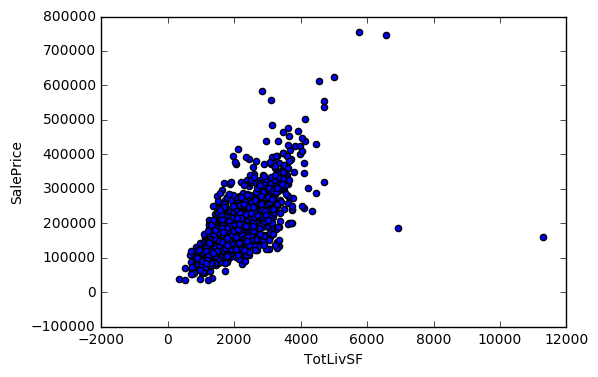

In [8]:
train.plot(x='TotLivSF', y='SalePrice', kind='scatter')

Remove the few houses above 5500 sqft as they seem pretty different from the others and there isn't enough data there for a good 
fit anyway

In [9]:
train[train['TotLivSF'] > 5500]

,SalePrice,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFinSF1,BsmtFinSF2,BedroomAbvGr,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath,TotLivSF,TotLivSF_sqrt,TotBath
523,184750,3138,1538,0,4676,2260,0,3,3,1,1,0,6936,83.282651,4.5
691,755000,2444,1872,0,4316,1455,0,4,3,1,0,1,5771,75.967098,4.0
1182,745000,2411,2065,0,4476,2096,0,4,3,1,1,0,6572,81.067873,4.5
1298,160000,4692,950,0,5642,5644,0,3,2,1,2,0,11286,106.235587,4.5


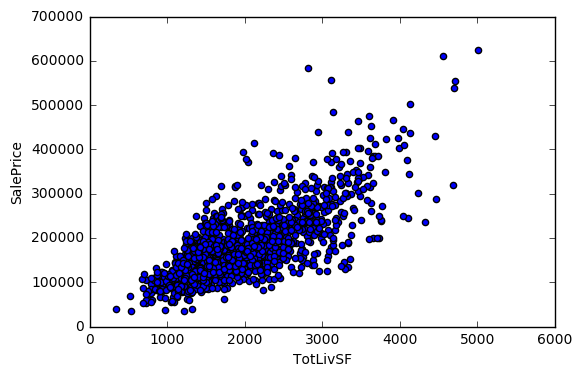

In [10]:
train = train[train['TotLivSF'] < 5500]
train.plot(x='TotLivSF', y='SalePrice', kind='scatter')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC5ADEFBA8>]], dtype=object)

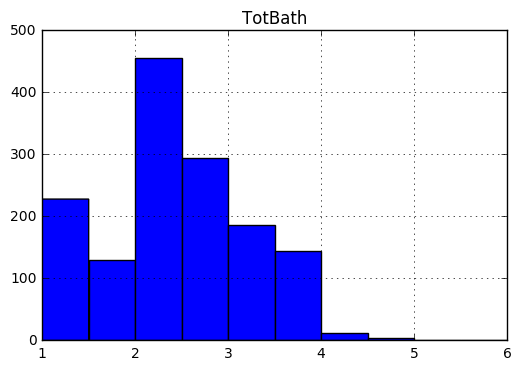

In [11]:
train.hist(column='TotBath')

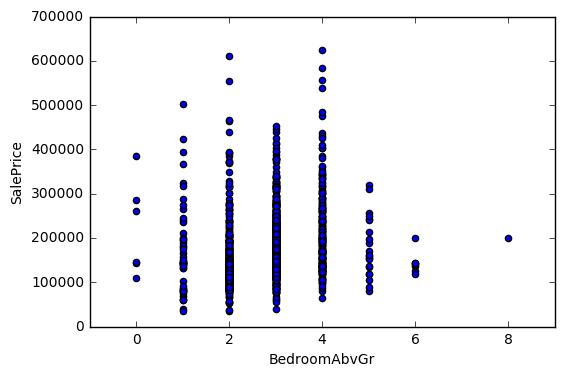

In [12]:
train.plot(x='BedroomAbvGr', y='SalePrice', kind='scatter')

Remove the really high bedroom count.  Should I remove 0 and 6 as well?

In [13]:
train = train[train['BedroomAbvGr'] <= 6]

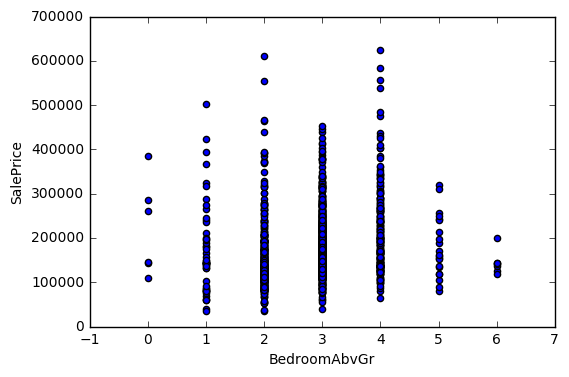

In [14]:
train.plot(x='BedroomAbvGr', y='SalePrice', kind='scatter')

In [15]:
train_sub, valid = train_test_split(train, test_size=0.25)

In [22]:
m = sklearn.linear_model.Ridge(normalize=True, )
m.fit(train[['TotLivSF']], train[['SalePrice']])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [23]:
res = m.predict(train[['TotLivSF']])

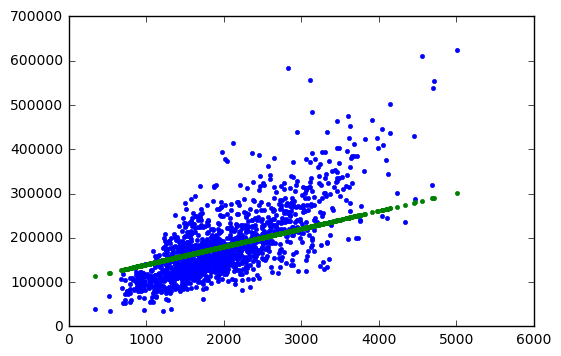

In [26]:
plt.plot(train[['TotLivSF']], train[['SalePrice']], '.',
        train[['TotLivSF']], res, 'g.')